# ML Final Project 
## RNN
 - Nick Clifford, Kevin Malloy, Aneesh Sandhir, Devan Visvalingam
 - May 5, 2020
 - SYS 6016

In [5]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.text import text_to_word_sequence

pd.options.display.max_columns = 300



In [6]:
subdir = 'Aneesh/'
age_layer = pd.read_csv(subdir+'age_layer.csv')
date_game_layer = pd.read_csv(subdir+'date_of_game_layer.csv')
home_game_layer = pd.read_csv(subdir+'home_game_layer.csv')
opponent_layer = pd.read_csv(subdir+'opponent_layer.csv')
opp_prob_layer = pd.read_csv(subdir+'opponent_playoff_probabilities_layer.csv')
participated_layer = pd.read_csv(subdir+'participated_layer.csv')
team_prob_layer = pd.read_csv(subdir+'team_playoff_probabilities_layer.csv')
time_elapsed_layer = pd.read_csv(subdir+'time_elapsed_layer.csv')

In [7]:
age_layer = age_layer.rename(columns={'Unnamed: 0':'Game Number'})
date_game_layer = date_game_layer.rename(columns={'Unnamed: 0':'Game Number'})
home_game_layer = home_game_layer.rename(columns={'Unnamed: 0':'Game Number'})
opponent_layer = opponent_layer.rename(columns={'Unnamed: 0':'Game Number'})
opp_prob_layer = opp_prob_layer.rename(columns={'Unnamed: 0':'Game Number'})
participated_layer = participated_layer.rename(columns={'Unnamed: 0':'Game Number'})
team_prob_layer = team_prob_layer.rename(columns={'Unnamed: 0':'Game Number'})
time_elapsed_layer = time_elapsed_layer.rename(columns={'Unnamed: 0':'Game Number'})

In [8]:
display(age_layer.head())
display(time_elapsed_layer.head())

,Game Number,John Wall,Khris Middleton,Nikola Vucevic,Devin Booker,Domantas Sabonis,Andre Drummond,LaMarcus Aldridge,Ben Simmons,Jimmy Butler,LeBron James,Dirk Nowitzki,Luka Doncic,Blake Griffin,Damian Lillard,Chris Paul,Jayson Tatum,Marc Gasol,Al Horford,Giannis Antetokounmpo,Bam Adebayo,Dwyane Wade,Brandon Ingram,Bradley Beal,Pau Gasol,Gordon Hayward,Karl-Anthony Towns,Paul George,Kevin Durant,Rudy Gobert,Goran Dragic,Kawhi Leonard,Kyrie Irving,Russell Westbrook,James Harden,Paul Millsap,Victor Oladipo,Isaiah Thomas,Draymond Green,Carmelo Anthony,Kemba Walker,Joel Embiid,Nikola Jokic,Donovan Mitchell,DeAndre Jordan,D'Angelo Russell,Pascal Siakam,DeMarcus Cousins,Kobe Bryant,Stephen Curry,Kyle Lowry,DeMar DeRozan,Trae Young,Anthony Davis,Klay Thompson
0,Game 1 of the 2015 - 2016 Season,25.141684,24.210815,25.010267,18.992471,NaN,22.212183,30.275154,19.271732,26.116359,30.822724,37.357974,NaN,26.617385,25.286790,30.477755,NaN,30.743326,29.399042,20.892539,NaN,33.776865,NaN,22.332649,35.307324,25.598905,19.950719,25.489391,27.077344,23.337440,29.478439,24.331280,23.594798,26.956879,26.171116,30.707734,23.482546,26.718686,25.648186,31.414100,25.472964,21.618070,20.687201,NaN,27.268994,19.676934,NaN,25.207392,37.180014,27.619439,29.593429,26.223135,NaN,22.628337,25.713895
1,Game 2 of the 2015 - 2016 Season,25.147159,24.216290,25.015743,18.997947,NaN,22.214921,30.280630,19.277207,26.119097,30.825462,37.360712,NaN,26.620123,25.292266,30.480493,NaN,30.746064,29.404517,20.898015,NaN,33.782341,NaN,22.338125,35.310062,25.604381,19.956194,25.492129,27.082820,23.342916,29.483915,24.336756,23.597536,26.962355,26.176591,30.713210,23.488022,26.724162,25.656400,31.416838,25.478439,21.623546,20.692676,NaN,27.271732,19.682409,NaN,25.212868,37.185489,27.627652,29.598905,26.228611,NaN,22.631075,25.722108
2,Game 3 of the 2015 - 2016 Season,25.149897,24.221766,25.021218,19.000684,NaN,22.220397,30.286105,19.285421,26.124572,30.830938,37.368925,NaN,26.625599,25.295003,30.485969,NaN,30.751540,29.407255,20.903491,NaN,33.787817,NaN,22.340862,35.315537,25.607118,19.964408,25.497604,27.088296,23.345654,29.489391,24.342231,23.603012,26.967830,26.182067,30.715948,23.493498,26.729637,25.659138,31.422313,25.483915,21.631759,20.698152,NaN,27.277207,19.687885,NaN,25.215606,37.190965,27.630390,29.604381,26.234086,NaN,22.639288,25.724846
3,Game 4 of the 2015 - 2016 Season,25.160849,24.224504,25.026694,19.006160,NaN,22.231348,30.288843,19.290897,26.130048,30.839151,37.374401,NaN,26.631075,25.300479,30.491444,NaN,30.757016,29.412731,20.906229,NaN,33.793292,NaN,22.351814,35.321013,25.618070,19.972621,25.505818,27.091034,23.356605,29.494867,24.344969,23.611225,26.970568,26.184805,30.721424,23.498973,26.737851,25.664613,31.427789,25.489391,21.637235,20.703628,NaN,27.282683,19.693361,NaN,25.223819,37.196441,27.635866,29.609856,26.239562,NaN,22.647502,25.730322
4,Game 5 of the 2015 - 2016 Season,25.166324,24.229979,25.029432,19.011636,NaN,22.239562,30.294319,19.296372,26.135524,30.844627,37.379877,NaN,26.636550,25.305955,30.496920,NaN,30.759754,29.418207,20.911704,NaN,33.798768,NaN,22.357290,35.326489,25.620808,19.978097,25.508556,27.096509,23.359343,29.500342,24.350445,23.616701,26.976044,26.190281,30.726899,23.501711,26.743326,25.670089,31.433265,25.494867,21.642710,20.709103,NaN,27.288159,19.701574,NaN,25.226557,37.204654,27.641342,29.612594,26.242300,NaN,22.655715,25.735797


,Game Number,John Wall,Khris Middleton,Nikola Vucevic,Devin Booker,Domantas Sabonis,Andre Drummond,LaMarcus Aldridge,Ben Simmons,Jimmy Butler,LeBron James,Dirk Nowitzki,Luka Doncic,Blake Griffin,Damian Lillard,Chris Paul,Jayson Tatum,Marc Gasol,Al Horford,Giannis Antetokounmpo,Bam Adebayo,Dwyane Wade,Brandon Ingram,Bradley Beal,Pau Gasol,Gordon Hayward,Karl-Anthony Towns,Paul George,Kevin Durant,Rudy Gobert,Goran Dragic,Kawhi Leonard,Kyrie Irving,Russell Westbrook,James Harden,Paul Millsap,Victor Oladipo,Isaiah Thomas,Draymond Green,Carmelo Anthony,Kemba Walker,Joel Embiid,Nikola Jokic,Donovan Mitchell,DeAndre Jordan,D'Angelo Russell,Pascal Siakam,DeMarcus Cousins,Kobe Bryant,Stephen Curry,Kyle Lowry,DeMar DeRozan,Trae Young,Anthony Davis,Klay Thompson
0,Game 1 of the 2015 - 2016 Season,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0,NaN,10.0,10.0,10.0,NaN,10.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0
1,Game 2 of the 2015 - 2016 Season,2.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0,1.0,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,2.0,NaN,2.0,NaN,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,NaN,1.0,2.0,NaN,2.0,2.0,3.0,2.0,2.0,NaN,1.0,3.0
2,Game 3 of the 2015 - 2016 Season,1.0,2.0,2.0,1.0,NaN,2.0,2.0,3.0,2.0,2.0,3.0,NaN,2.0,1.0,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,1.0,2.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,NaN,2.0,2.0,NaN,1.0,2.0,1.0,2.0,2.0,NaN,3.0,1.0
3,Game 4 of the 2015 - 2016 Season,4.0,1.0,2.0,2.0,NaN,4.0,1.0,2.0,2.0,3.0,2.0,NaN,2.0,2.0,2.0,NaN,2.0,2.0,1.0,NaN,2.0,NaN,4.0,2.0,4.0,3.0,3.0,1.0,4.0,2.0,1.0,3.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,NaN,3.0,2.0,2.0,2.0,2.0,NaN,3.0,2.0
4,Game 5 of the 2015 - 2016 Season,2.0,2.0,1.0,2.0,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,NaN,1.0,2.0,2.0,NaN,2.0,NaN,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,3.0,NaN,1.0,3.0,2.0,1.0,1.0,NaN,3.0,2.0


# Creating new filter columns (Filtering out seasons 2019 and 2020)

In [9]:
age_layer.loc[~(age_layer['Game Number'].str.contains('2019 - 2020') | age_layer['Game Number'].str.contains('2018 - 2019')), '<=2018'] = 1
age_layer['<=2018'] = age_layer['<=2018'].fillna(0)
age_layer['<=2018'] = age_layer['<=2018'].astype(int)

In [10]:
age_layer2 = age_layer[age_layer['<=2018'] == 1]
age_layer2 = age_layer2.drop(columns='<=2018')

In [11]:
age_layer2.shape

(246, 55)

In [12]:
age_layer2.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            236, 237, 238, 239, 240, 241, 242, 243, 244, 245],
           dtype='int64', length=246)

In [13]:
indices = age_layer2.index.values

In [14]:
# Filtering rest of layers based off age_layer2 index filter
date_game_layer2 = date_game_layer.iloc[indices].T
home_game_layer2 = home_game_layer.iloc[indices].T
opponent_layer2 = opponent_layer.iloc[indices].T
opp_prob_layer2 = opp_prob_layer.iloc[indices].T
participated_layer2 = participated_layer.iloc[indices].T
team_prob_layer2 = team_prob_layer.iloc[indices].T
time_elapsed_layer2 = time_elapsed_layer.iloc[indices].T

# Transposing age_layer
age_layer2 = age_layer2.T

In [15]:
Game_Number_index = pd.DataFrame(age_layer2.iloc[0,:]).T

In [16]:
# Dropping Game Number row 

age_layer2 = age_layer2.iloc[1:,:]
date_game_layer2 = date_game_layer2.iloc[1:,:]
home_game_layer2 = home_game_layer2.iloc[1:,:]
opponent_layer2 = opponent_layer2.iloc[1:,:]
opp_prob_layer2 = opp_prob_layer2.iloc[1:,:]
participated_layer2 = participated_layer2.iloc[1:,:]
team_prob_layer2 = team_prob_layer2.iloc[1:,:]
time_elapsed_layer2 = time_elapsed_layer2.iloc[1:,:]

# Removing NaN values

## Removing Players with NaN values (Brute Force method)

In [17]:
def nans(df): return df[df.isnull().any(axis=1)]
nan_rows = nans(age_layer2)
nan_players = nan_rows.index.values
nan_players

array(['Domantas Sabonis', 'Luka Doncic', 'Jayson Tatum', 'Bam Adebayo',
       'Dwyane Wade', 'Brandon Ingram', 'Donovan Mitchell',
       'Pascal Siakam', 'Kobe Bryant', 'Trae Young'], dtype=object)

In [18]:
all_players = age_layer2.index.values
all_players


array(['John Wall', 'Khris Middleton', 'Nikola Vucevic', 'Devin Booker',
       'Domantas Sabonis', 'Andre Drummond', 'LaMarcus Aldridge',
       'Ben Simmons', 'Jimmy Butler', 'LeBron James', 'Dirk Nowitzki',
       'Luka Doncic', 'Blake Griffin', 'Damian Lillard', 'Chris Paul',
       'Jayson Tatum', 'Marc Gasol', 'Al Horford',
       'Giannis Antetokounmpo', 'Bam Adebayo', 'Dwyane Wade',
       'Brandon Ingram', 'Bradley Beal', 'Pau Gasol', 'Gordon Hayward',
       'Karl-Anthony Towns', 'Paul George', 'Kevin Durant', 'Rudy Gobert',
       'Goran Dragic', 'Kawhi Leonard', 'Kyrie Irving',
       'Russell Westbrook', 'James Harden', 'Paul Millsap',
       'Victor Oladipo', 'Isaiah Thomas', 'Draymond Green',
       'Carmelo Anthony', 'Kemba Walker', 'Joel Embiid', 'Nikola Jokic',
       'Donovan Mitchell', 'DeAndre Jordan', "D'Angelo Russell",
       'Pascal Siakam', 'DeMarcus Cousins', 'Kobe Bryant',
       'Stephen Curry', 'Kyle Lowry', 'DeMar DeRozan', 'Trae Young',
       'Anthony D

In [19]:
complete_players = np.array(list(set(all_players)-set(nan_players)))

In [20]:
age_layer2_5 = age_layer2.loc[complete_players]
date_game_layer2_5 = date_game_layer2.loc[complete_players]
home_game_layer2_5 = home_game_layer2.loc[complete_players]
opponent_layer2_5 = opponent_layer2.loc[complete_players]
opp_prob_layer2_5 = opp_prob_layer2.loc[complete_players]
participated_layer2_5 = participated_layer2.loc[complete_players]
team_prob_layer2_5 = team_prob_layer2.loc[complete_players]
time_elapsed_layer2_5 = time_elapsed_layer2.loc[complete_players]

In [23]:
participated_layer2_5.head()   # This is the response, y -- 54 time series sequences of binary responses

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245
Kemba Walker,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Nikola Jokic,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Devin Booker,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
Paul George,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Gordon Hayward,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
age_layer2_5.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245
Kemba Walker,25.473,25.4784,25.4839,25.4894,25.4949,25.5003,25.5086,25.5113,25.5168,25.5222,25.5277,25.5305,25.5359,25.5441,25.5496,25.5551,25.5606,25.5688,25.577,25.5825,25.588,25.5934,25.5962,25.6071,25.6099,25.6153,25.6208,25.6263,25.6345,25.64,25.6454,25.6509,25.6537,25.6591,25.6646,25.6728,25.6756,25.6838,25.6893,25.692,25.6975,25.7029,25.7084,25.7112,25.7166,25.7221,25.7276,25.7331,25.7413,25.7467,25.7495,25.755,25.7604,25.7851,25.7906,25.7988,25.8042,25.8097,25.8152,25.8179,25.8234,25.8316,25.8371,25.8426,25.8453,25.8508,25.8563,25.859,25.8645,25.87,25.8727,25.8809,25.8836,25.8919,25.9001,25.9055,25.911,25.9138,25.9192,25.9247,25.9274,25.9329,26.4695,26.475,26.4778,26.4887,26.4942,26.5024,26.5079,26.5133,26.5188,26.5243,26.5325,26.5352,26.5407,26.5462,26.5517,26.5544,26.5599,26.5626,26.5681,26.5736,26.5791,26.5845,26.59,26.5927,26.5982,26.6037,26.6092,26.6119,26.6201,26.6283,26.6366,26.642,26.6448,26.6502,26.6557,26.6612,26.6639,26.6694,26.6776,26.6858,26.694,26.6995,26.705,26.7077,26.7132,26.7187,26.7242,26.7269,26.7351,26.7379,26.7461,26.7543,26.7598,26.7652,26.7707,26.7762,26.7981,26.8036,26.8063,26.8118,26.8172,26.8227,26.8282,26.8337,26.8392,26.8419,26.8474,26.8528,26.8611,26.8665,26.872,26.8775,26.883,26.8884,26.8912,26.8966,26.9021,26.9076,26.9103,26.9185,26.924,26.9268,27.447,27.4524,27.4606,27.4661,27.4716,27.4771,27.4798,27.4853,27.4908,27.4962,27.5017,27.5099,27.5236,27.5291,27.5318,27.5373,27.5428,27.5483,27.551,27.5619,27.5674,27.5756,27.5811,27.5866,27.5893,27.5948,27.6003,27.6057,27.6085,27.614,27.6194,27.6249,27.6277,27.6386,27.6441,27.6496,27.655,27.6632,27.6769,27.6824,27.6851,27.6906,27.6961,27.7043,27.7098,27.7153,27.7207,27.7235,27.729,27.7344,27.7399,27.7454,27.7481,27.7563,27.7591,27.7645,27.7728,27.7947,27.7974,27.8029,27.8084,27.8111,27.8166,27.822,27.8275,27.833,27.8385,27.8467,27.8522,27.8576,27.8631,27.8686,27.8713,27.8768,27.8823,27.8877,27.896,27.8987,27.9042,27.9124,27.9179,27.9233
Nikola Jokic,20.6872,20.6927,20.6982,20.7036,20.7091,20.7118,20.7201,20.7255,20.731,20.7337,20.742,20.7447,20.7502,20.7556,20.7611,20.7693,20.7721,20.7775,20.783,20.7858,20.7912,20.7995,20.8077,20.8159,20.8186,20.8268,20.8323,20.8378,20.8405,20.8487,20.8515,20.8569,20.8597,20.8679,20.8706,20.8789,20.8843,20.8898,20.898,20.9035,20.909,20.9144,20.9199,20.9254,20.9309,20.9363,20.9391,20.9446,20.95,20.9555,20.961,20.9665,20.9692,20.9747,20.9993,21.0048,21.0103,21.013,21.0185,21.0267,21.0322,21.0376,21.0431,21.0486,21.0541,21.0595,21.065,21.0678,21.0732,21.0787,21.0842,21.0897,21.0951,21.1006,21.1034,21.1088,21.1116,21.117,21.1253,21.1335,21.1389,21.1472,21.6838,21.692,21.6975,21.7057,21.7112,21.7139,21.7194,21.7248,21.7303,21.7331,21.7413,21.7467,21.7522,21.7577,21.7604,21.7659,21.7714,21.7796,21.7851,21.7878,21.7933,21.7988,21.8015,21.807,21.8125,21.8207,21.8261,21.8316,21.8344,21.8426,21.8508,21.8563,21.8617,21.87,21.8727,21.8782,21.8836,21.8973,21.9083,21.911,21.9165,21.922,21.9247,21.9302,21.9357,21.9411,21.9493,21.9521,21.9576,21.9603,21.9658,21.9713,21.9767,21.9795,21.9849,21.9904,22.0123,22.0151,22.0205,22.026,22.0287,22.037,22.0424,22.0479,22.0534,22

In [41]:
participated_layer2_5.sum().sum() # active

9011.0

In [43]:
participated_layer2_5.shape

(44, 246)

In [45]:
(44*246) - 9011.0 # inactive

1813.0

# Minmaxscaling age_layer and time_elapsed_layer

### Scaling age layer


In [25]:
scaler = MinMaxScaler()

age_layer2_5.max().max(), age_layer2_5.min().min()

#age_max = age_layer2_5.max().max()

#age_min = age_layer2_5.min().min()

#age_layer2_5.head() # should scale age across players

(39.80835044490075, 18.992470910335392)

In [ ]:
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min

In [26]:
# Scaling age layer

def age_minmax(x):
    return (x - 18.992470910335392) / (39.80835044490075 - 18.992470910335392)


age_layer2_5 = age_layer2_5.applymap(age_minmax)

### Scaling time_elapsed layer

In [27]:
time_elapsed_layer2_5.max().max(), time_elapsed_layer2_5.min().min()

(10.0, 1.0)

In [28]:
# Scaling time_elapsed layer

def time_elapsed_minmax(x):
    return (x - 1) / (10-1)

time_elapsed_layer2_5 = time_elapsed_layer2_5.applymap(time_elapsed_minmax)

In [252]:
time_elapsed_layer2_5.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245
DeAndre Jordan,1.0,0.000000,0.111111,0.111111,0.111111,0.222222,0.111111,0.111111,0.000000,0.111111,0.444444,0.000000,0.111111,0.111111,0.000000,0.111111,0.111111,0.000000,0.111111,0.222222,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.000000,0.111111,0.333333,0.000000,0.111111,0.111111,0.000000,0.111111,0.333333,0.222222,0.000000,0.222222,0.222222,0.111111,0.222222,0.000000,0.111111,0.111111,0.000000,0.111111,0.111111,0.222222,0.111111,0.111111,0.000000,0.111111,0.777778,0.111111,0.111111,0.111111,0.111111,0.222222,0.111111,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.222222,0.000000,0.222222,0.000000,0.222222,0.000000,0.111111,0.000000,0.222222,0.111111,0.000000,0.111111,0.111111,0.111111,0.000000,1.0,0.222222,0.000000,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.111111,0.222222,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.111111,0.000000,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.222222,0.222222,0.111111,0.222222,0.111111,0.111111,0.000000,0.333333,0.333333,0.000000,0.222222,0.000000,0.111111,0.222222,0.111111,0.111111,0.777778,0.000000,0.111111,0.222222,0.111111,0.000000,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111,0.000000,0.111111,0.111111,0.000000,0.222222,0.000000,0.111111,0.333333,0.222222,0.111111,0.111111,1.0,0.111111,0.222222,0.111111,0.111111,0.111111,0.111111,0.222222,0.000000,0.111111,0.222222,0.000000,0.111111,0.333333,0.000000,0.111111,0.111111,0.222222,0.111111,0.222222,0.111111,0.000000,0.222222,0.222222,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.000000,0.222222,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,0.333333,0.111111,0.333333,0.000000,0.111111,0.111111,0.777778,0.000000,0.333333,0.000000,0.111111,0.111111,0.111111,0.222222,0.000000,0.222222,0.111111,0.000000,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
Ben Simmons,1.0,0.111111,0.222222,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.222222,0.111111,0.222222,0.000000,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.000000,0.222222,0.111111,0.111111,0.111111,0.000000,0.111111,0.222222,0.111111,0.000000,0.333333,0.111111,0.111111,0.111111,0.333333,0.111111,0.000000,0.222222,0.333333,0.111111,0.000000,0.111111,0.111111,0.888889,0.111111,0.111111,0.000000,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.222222,0.111111,0.000000,0.222222,0.111111,0.000000,0.111111,0.000000,0.111111,0.222222,0.000000,0.111111,0.222222,0.000000,0.222222,0.222222,0.111111,0.111111,0.000000,1.0,0.222222,0.222222,0.000000,0.222222,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.333333,

# Converting to NumPy

In [29]:
age_layer3 = age_layer2_5.to_numpy()
date_game_layer3 = date_game_layer2_5.to_numpy()
home_game_layer3 = home_game_layer2_5.to_numpy()
opponent_layer3 = opponent_layer2_5.to_numpy()
opp_prob_layer3 = opp_prob_layer2_5.to_numpy()
participated_layer3 = participated_layer2_5.to_numpy()
team_prob_layer3 = team_prob_layer2_5.to_numpy()
time_elapsed_layer3 = time_elapsed_layer2_5.to_numpy()

In [274]:
feat_3D_np = np.stack([age_layer3, home_game_layer3, opp_prob_layer3, team_prob_layer3, time_elapsed_layer3], axis=2)

# Converting to tf.tensor

In [30]:
# predictor variables
age_layer4 = tf.convert_to_tensor(age_layer3, dtype=tf.float32)
#date_game_layer4 = tf.convert_to_tensor(date_game_layer3, dtype=tf.float32)   # don't need the dates
home_game_layer4 = tf.convert_to_tensor(home_game_layer3, dtype=tf.float32)
#opponent_layer4 = tf.convert_to_tensor(opponent_layer3, dtype=tf.float32)      # It is a string of team name, don't need
opp_prob_layer4 = tf.convert_to_tensor(opp_prob_layer3, dtype=tf.float32)
team_prob_layer4 = tf.convert_to_tensor(team_prob_layer3, dtype=tf.float32)
time_elapsed_layer4 = tf.convert_to_tensor(time_elapsed_layer3, dtype=tf.float32)


# response variable
participated_layer4 = tf.convert_to_tensor(participated_layer3, dtype=tf.float32)



In [31]:
time_elapsed_layer4

<tf.Tensor: shape=(44, 246), dtype=float32, numpy=
array([[1.        , 0.11111111, 0.11111111, ..., 0.22222222, 0.11111111,
        0.11111111],
       [1.        , 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
        0.11111111],
       [1.        , 0.11111111, 0.        , ..., 0.22222222, 0.11111111,
        0.11111111],
       ...,
       [1.        , 0.        , 0.11111111, ..., 0.11111111, 0.        ,
        0.11111111],
       [1.        , 0.11111111, 0.11111111, ..., 0.11111111, 0.22222222,
        0.        ],
       [1.        , 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
        0.11111111]], dtype=float32)>

# Creating 3D tensor for features space

In [32]:
age_layer4.shape, home_game_layer4.shape, opp_prob_layer4.shape, team_prob_layer4.shape, time_elapsed_layer4.shape

(TensorShape([44, 246]),
 TensorShape([44, 246]),
 TensorShape([44, 246]),
 TensorShape([44, 246]),
 TensorShape([44, 246]))

In [33]:
feat_3D_t = tf.stack([age_layer4, home_game_layer4, opp_prob_layer4, team_prob_layer4, time_elapsed_layer4], axis=2)

In [34]:
feat_3D_t.shape     # our X data structure

TensorShape([44, 246, 5])

In [35]:
participated_layer4.shape  # our y data structure

TensorShape([44, 246])

In [36]:
len(feat_3D_t), len(participated_layer4)

(44, 44)

# Building the RNN

In [46]:
type(feat_3D_t)

tensorflow.python.framework.ops.EagerTensor

In [132]:
#80:20 split

train_X = feat_3D_t[0:35]
train_y = participated_layer4[0:35]
test_X = feat_3D_t[35:43]
test_y = participated_layer4[35:43]

In [133]:
train_X.shape,train_y.shape,test_X.shape,test_y.shape

(TensorShape([35, 246, 5]),
 TensorShape([35, 246]),
 TensorShape([8, 246, 5]),
 TensorShape([8, 246]))

In [134]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),]
METRICS = ['tp', 'fp', 'tn', 'fn','accuracy','precision','recall','auc']

METRICS = ['TruePositives','FalsePositives',
          'TrueNegatives','FalseNegatives',
          'Accuracy','Precision','Recall',
          'AUC']
METRICS = ['Precision']

In [136]:
shallow = models.Sequential()

shallow.add(layers.SimpleRNN(units=8, activation='relu', 
                             kernel_regularizer = regularizers.l2(0.1), 
                             dropout=0.3, recurrent_dropout=0.3, input_shape=(246,5),
                            return_sequences=True))
            
shallow.add(layers.TimeDistributed(layers.Dense(1, activation='sigmoid')))

In [137]:
shallow.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [138]:
history = shallow.fit(train_X, train_y,
                    epochs=50,
                    batch_size=1,
                    validation_data=(test_X, test_y))

Train on 35 samples, validate on 8 samples
Epoch 1/50
35/35 [==============================] - 2s 62ms/sample - loss: 9.3056 - accuracy: 0.2818 - val_loss: 13.8115 - val_accuracy: 0.1280
Epoch 2/50
35/35 [==============================] - 1s 38ms/sample - loss: 9.1615 - accuracy: 0.3631 - val_loss: 13.5604 - val_accuracy: 0.1387
Epoch 3/50
35/35 [==============================] - 1s 39ms/sample - loss: 9.0392 - accuracy: 0.3976 - val_loss: 13.0577 - val_accuracy: 0.1545
Epoch 4/50
35/35 [==============================] - 1s 38ms/sample - loss: 9.5276 - accuracy: 0.3437 - val_loss: 12.4970 - val_accuracy: 0.1794
Epoch 5/50
35/35 [==============================] - 1s 39ms/sample - loss: 9.1051 - accuracy: 0.3393 - val_loss: 11.9197 - val_accuracy: 0.2002
Epoch 6/50
35/35 [==============================] - 1s 39ms/sample - loss: 7.9219 - accuracy: 0.3653 - val_loss: 11.0906 - val_accuracy: 0.2444
Epoch 7/50
35/35 [==============================] - 1s 39ms/sample - loss: 8.8390 - accuracy:

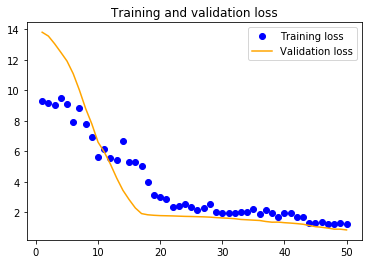

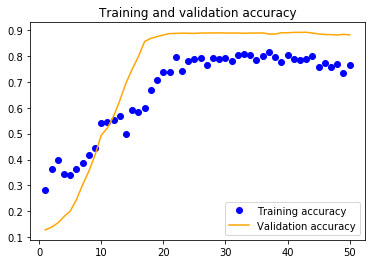

In [139]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [140]:
y_prob = shallow.predict(test_X, batch_size=1)

In [141]:
y_classes = shallow.predict_classes(test_X,batch_size=1)

- Recall that 1: activity, 0: inactivity
- We are trying to predict inactivity

In [142]:
# Recall
m = tf.keras.metrics.Precision()
m.update_state(test_y, y_classes.reshape(8,246))
print('Final result: ', m.result().numpy())  # Final result: 0.89

Final result:  0.8906009


In [143]:
# Precision
m = tf.keras.metrics.Recall()
m.update_state(test_y, y_classes.reshape(8,246))
print('Final result: ', m.result().numpy())  # Final result: 0.988

Final result:  0.9885975


In [145]:
# Accuracy
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(test_y, y_classes.reshape(8,246))
print('Final result: ', m.result().numpy())  # Final result: 0.88

Final result:  0.8816057


In [125]:
y_classes.reshape(8,246).shape

(8, 246)

In [147]:
participated_layer4

<tf.Tensor: shape=(44, 246), dtype=float32, numpy=
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>